In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


# 1. Importando os datasets

Temos dois arquivos que precisamos usar nesta competição: test.csv and train.csv.

In [6]:
# Definindo o caminho da pasta
input_path = '/kaggle/input/titanic/'

# Carregando os datasets
train_data = pd.read_csv(input_path + 'train.csv')
test_data = pd.read_csv(input_path + 'test.csv')
gender_submission = pd.read_csv(input_path + 'gender_submission.csv')

# Visualizando as primeiras linhas dos arquivos para conferir
print("Treino carregado com sucesso!")
display(train_data.head())
print("Teste carregado com sucesso!")
display(test_data.head())
print("Exemplo de submissão carregado com sucesso!")
display(gender_submission.head())

# Verificando as dimensões de cada dataset
print(f"Shape do Treino: {train_data.shape}")
print(f"Shape do Teste:  {test_data.shape}")

Treino carregado com sucesso!


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Teste carregado com sucesso!


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


Exemplo de submissão carregado com sucesso!


,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


Shape do Treino: (891, 12)
Shape do Teste:  (418, 11)


In [7]:
print("Verificando colunas do treino:\n")
train_data.info()
train_data.columns

print("\n")
print("=" * 60)
print("\n")

print("Verificando colunas do teste:\n")
test_data.info()
test_data.columns

Verificando colunas do treino:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB




Verificando colunas do teste:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       ------------

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [8]:
# Mostra a contagem de valores nulos por coluna
print("Verificando valores nulos do treino:\n")
print(train_data.isnull().sum())
print("\n")
print("Verificando valores nulos do teste:\n")
print(test_data.isnull().sum())

Verificando valores nulos do treino:

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


Verificando valores nulos do teste:

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [9]:
# Calculando a porcentagem de valores nulos
null_pct = (train_data.isnull().sum() / len(train_data)) * 100

# Criando um DataFrame para facilitar a leitura
null_df = pd.DataFrame({
    'Coluna': train_data.columns,
    'Nulos (Absoluto)': train_data.isnull().sum(),
    'Nulos (%)': null_pct.round(2) # Arredondando para 2 casas decimais
})

# Ordenando para ver os maiores problemas primeiro
print(null_df.sort_values(by='Nulos (%)', ascending=False))

# Não devemos alterar os valores do teste, por isso não iremos nos aprofundar nos dados nulos do dataset

                  Coluna  Nulos (Absoluto)  Nulos (%)
Cabin              Cabin               687      77.10
Age                  Age               177      19.87
Embarked        Embarked                 2       0.22
PassengerId  PassengerId                 0       0.00
Name                Name                 0       0.00
Pclass            Pclass                 0       0.00
Survived        Survived                 0       0.00
Sex                  Sex                 0       0.00
Parch              Parch                 0       0.00
SibSp              SibSp                 0       0.00
Fare                Fare                 0       0.00
Ticket            Ticket                 0       0.00


## 1.1 Separando colunas em numéricas e categóricas

Vamos separar as colunas baseado no tipo de dado e na utilidade delas para o modelo.

No Titanic, nem toda coluna é útil. Por exemplo, **PassengerId**, **Name** e **Ticket** são identificadores únicos que tendem a confundir o modelo (*overfitting*).

Precisamos focar no que realmente importa.

In [10]:
# Agora precisamos separar as colunas em dados categóricos e numéricos
# 1. Definimos o Alvo (Target)
y = train_data.Survived

# 2. Selecionamos as colunas que vamos usar (Features)
# Removemos Survived (alvo) e as colunas de texto único/ID
cols_to_use = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
X = train_data[cols_to_use]

# 3. Separamos por tipo
# Colunas Categóricas: Geralmente tipo 'object' e com poucos valores únicos (baixa cardinalidade)
categorical_cols = [cname for cname in X.columns if 
                    X[cname].dtype == "object" and
                    X[cname].nunique() < 10]

# Colunas Numéricas: tipo 'int64' ou 'float64'
numerical_cols = [cname for cname in X.columns if 
                  X[cname].dtype in ['int64', 'float64']]

print(f"Colunas Numéricas: {numerical_cols}")
print(f"Colunas Categóricas: {categorical_cols}")

Colunas Numéricas: ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
Colunas Categóricas: ['Sex', 'Embarked']


### Por que separamos assim?

**Cardinalidade**: No código acima, adicionamos uma regra X[cname].nunique() < 10. Isso serve para evitar colunas de texto com nomes demais. Se uma coluna categórica tiver 500 nomes diferentes, o OneHotEncoder criaria 500 colunas novas, o que tornaria o modelo lento e impreciso.

**Limpeza Automática**: Ao definir cols_to_use, já deixamos de fora o PassengerId e o Name, que não ajudam a prever a sobrevivência de forma genérica.

In [11]:
# 1. Definimos todas as colunas disponíveis originalmente
all_columns = train_data.columns.tolist()

# 2. Definimos as que selecionamos
selected_columns = numerical_cols + categorical_cols + ['Survived']

# 3. Identificamos as excluídas usando List Comprehension
excluded_cols = [col for col in all_columns if col not in selected_columns]

# --- Exibição Didática ---
print("✅ COLUNAS SELECIONADAS:")
print(f"Numéricas: {numerical_cols}")
print(f"Categóricas: {categorical_cols}")

print("\n❌ COLUNAS EXCLUÍDAS:")
for col in excluded_cols:
    # Vamos adicionar o motivo da exclusão para ficar mais claro
    reason = "Identificador/Texto único (Alta Cardinalidade)" if col in ['PassengerId', 'Name', 'Ticket', 'Cabin'] else "Outro"
    print(f"- {col}: {reason}")

✅ COLUNAS SELECIONADAS:
Numéricas: ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
Categóricas: ['Sex', 'Embarked']

❌ COLUNAS EXCLUÍDAS:
- PassengerId: Identificador/Texto único (Alta Cardinalidade)
- Name: Identificador/Texto único (Alta Cardinalidade)
- Ticket: Identificador/Texto único (Alta Cardinalidade)
- Cabin: Identificador/Texto único (Alta Cardinalidade)


### Por que essas colunas foram excluídas?

No Titanic, a exclusão dessas colunas específicas faz muito sentido para nosso Pipeline:

- **PassengerId**: É apenas um número sequencial. O modelo pode achar que "quem tem ID maior sobrevive mais" por pura coincidência (correlação espúria).
- **Name**: Cada nome é único. A menos que façamos uma técnica avançada para extrair títulos (como Mr., Miss, Dr.), o modelo não consegue aprender nada com nomes individuais.
- **Ticket**: Números de tickets variam muito e não têm um padrão matemático óbvio.
- **Cabin**: Como vimos, tem 77% de nulos. Manter essa coluna sem um tratamento especial geralmente "suja" o modelo.

# 2. Definição dos Pipelines

## 2.1 Pipeline Simples (O "Rápido e Prático")

**Foco**: Rapidez e simplicidade. Usa um modelo robusto que não exige escalonamento de dados.

**Imputação**: Preenche com constantes.

**Modelo**: RandomForestRegressor (ou Classifier).

In [14]:
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Preprocessamento básico
simple_num = SimpleImputer(strategy='mean')
simple_cat = OneHotEncoder(handle_unknown='ignore')

preprocessor_simple = ColumnTransformer(transformers=[
    ('num', simple_num, numerical_cols),
    ('cat', simple_cat, categorical_cols)
])

pipeline_simple = Pipeline(steps=[
    ('preprocessor', preprocessor_simple),
    ('model', RandomForestClassifier(n_estimators=100, random_state=42))
])

## 2.2 Pipeline Intermediário (O "Equilibrado")

**Foco**: Melhorar a precisão com tratamento estatístico. Aqui usamos o XGBoost, que é o queridinho do Kaggle.

**Imputação**: Mediana para números (evita distorção por outliers).

**Escalonamento**: StandardScaler (coloca tudo na mesma escala).

**Modelo**: XGBClassifier.

In [15]:
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler

inter_num = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

inter_cat = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor_inter = ColumnTransformer(transformers=[
    ('num', inter_num, numerical_cols),
    ('cat', inter_cat, categorical_cols)
])

pipeline_inter = Pipeline(steps=[
    ('preprocessor', preprocessor_inter),
    ('model', XGBClassifier(n_estimators=500, learning_rate=0.05, n_jobs=-1))
])

## 2.3 Pipeline Robusto (O "Caçador de Medalhas")

**Foco**: Máxima performance. Ele testa várias combinações usando GridSearchCV para achar os melhores parâmetros.

**Engenharia**: Poderíamos incluir seleção de variáveis.

**Tuning**: O Pipeline não roda apenas uma vez; ele roda centenas de vezes testando o que funciona melhor.

In [16]:
from sklearn.model_selection import GridSearchCV

# Usamos a estrutura do intermediário, mas vamos "tunar" os hiperparâmetros
param_grid = {
    'model__n_estimators': [10, 50, 100, 250, 500, 1000, 2000, 5000],
    'model__learning_rate': [0.001, 0.01, 0.05, 0.1, 0.5, 1, 2],
    'model__max_depth': [1, 3, 5, 7, 10]
}

# O GridSearchCV vai testar todas as combinações acima
robust_search = GridSearchCV(pipeline_inter, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

### Armazenando os tempos de treinamento

Se um modelo 10x mais para ganhar apenas 0,5% de precisão, ele não é interessante.

🚀 Iniciando o treinamento dos Pipelines...

✅ Simples (RF) finalizado em: 0.29 segundos
✅ Intermediário (XGBoost) finalizado em: 0.36 segundos
✅ Robusto (GridSearch) finalizado em: 241.65 segundos

--- RESUMO DE TEMPO ---
{'Simples (RF)': 0.29274892807006836, 'Intermediário (XGBoost)': 0.3628067970275879, 'Robusto (GridSearch)': 241.64509868621826}


<Axes: title={'center': 'Tempo de Treinamento (Segundos)'}>

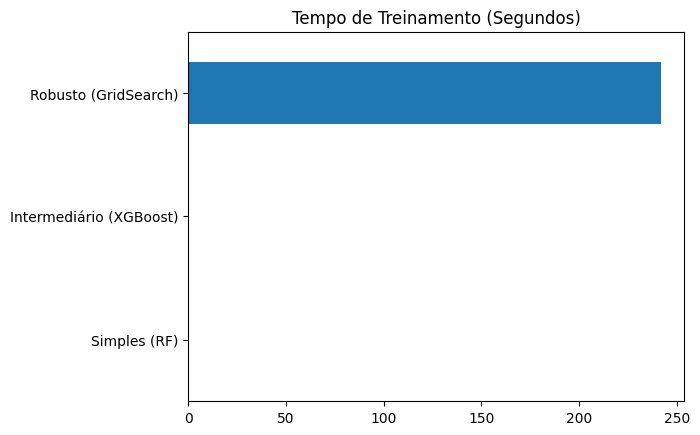

In [17]:
import time

# Dicionário para armazenar os tempos
pipeline_times = {}

# Lista com nossos modelos para facilitar o loop
pipelines = [
    ("Simples (RF)", pipeline_simple),
    ("Intermediário (XGBoost)", pipeline_inter),
    ("Robusto (GridSearch)", robust_search)
]

print("🚀 Iniciando o treinamento dos Pipelines...\n")

for name, pipe in pipelines:
    start_time = time.time() # Marca o início
    
    # Treinando o modelo
    pipe.fit(X, y)
    
    end_time = time.time() # Marca o fim
    
    # Calcula a duração em segundos
    duration = end_time - start_time
    pipeline_times[name] = duration
    
    print(f"✅ {name} finalizado em: {duration:.2f} segundos")

# Exibindo o resultado final consolidado
print("\n--- RESUMO DE TEMPO ---")
print(pipeline_times)

# Transforma o dicionário em uma série e plota
pd.Series(pipeline_times).plot(kind='barh', title='Tempo de Treinamento (Segundos)')

### Corrigindo o gráfico

As diferenças nos 3 Pipelines ficou tão grande que só conseguimos ver a barra do GridSearch.

Portanto, iremos usar uma escala logarítima para corrigir isso.

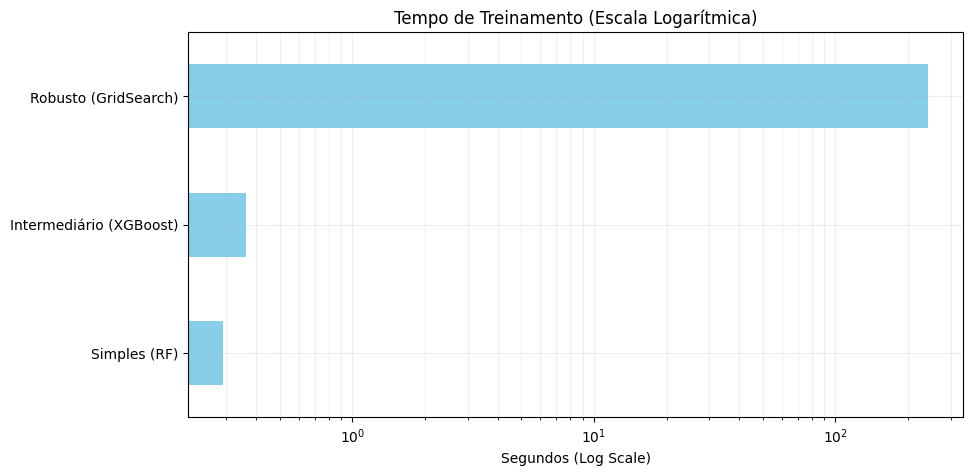

In [19]:
import matplotlib.pyplot as plt

df_results = pd.DataFrame({'Tempo (s)': pipeline_times.values()}, index=pipeline_times.keys())

# Criando o gráfico com escala logarítmica
ax = df_results['Tempo (s)'].plot(kind='barh', color='skyblue', figsize=(10, 5))
ax.set_xscale('log') # Aqui acontece a mágica

plt.title('Tempo de Treinamento (Escala Logarítmica)')
plt.xlabel('Segundos (Log Scale)')
plt.grid(True, which="both", ls="-", alpha=0.2)
plt.show()

Melhorou, mas ainda não está fácil de enxergar os valores.

Vamos comparar o esforço computacional relativo em uma escala de 0 a 1.

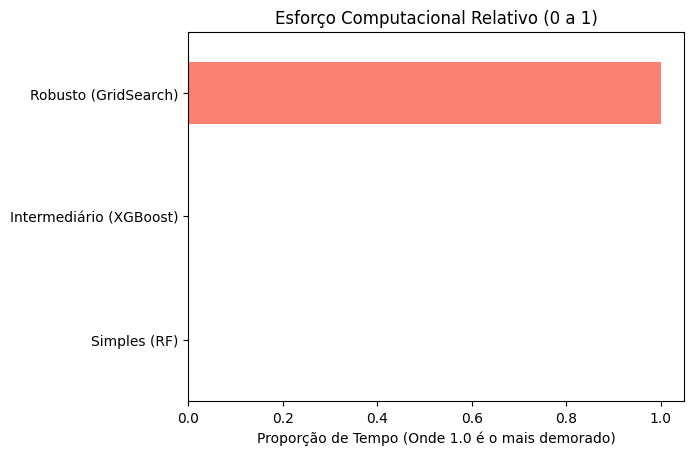

In [20]:
# Normalizando os valores para o intervalo [0, 1]
tempo_min = min(pipeline_times.values())
tempo_max = max(pipeline_times.values())

normalized_times = {k: (v - tempo_min) / (tempo_max - tempo_min) for k, v in pipeline_times.items()}

# Plotando
pd.Series(normalized_times).plot(kind='barh', color='salmon')
plt.title('Esforço Computacional Relativo (0 a 1)')
plt.xlabel('Proporção de Tempo (Onde 1.0 é o mais demorado)')
plt.show()

# 3. Avaliando as métricas

A Acurácia é apenas a ponta do iceberg. No Titanic, como em muitos problemas de classificação, olhar apenas para a acurácia pode ser enganoso.

Para uma visão completa, vamos calcular:

- **Precision (Precisão)**: De todos que o modelo disse que sobreviveram, quantos realmente sobreviveram?

- **Recall (Revocação)**: De todos que realmente sobreviveram, quantos o modelo conseguiu encontrar?

- **F1-Score**: Um equilíbrio entre Precision e Recall.

- **Balanced Accuracy (Acurácia Balanceada)**: Ela calcula a acurácia para cada classe individualmente e depois faz a média.

📊 Gerando Relatórios Detalhados...



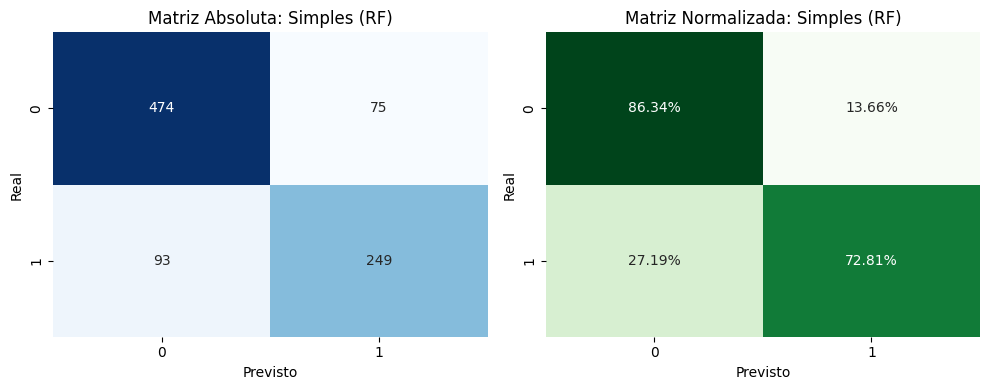

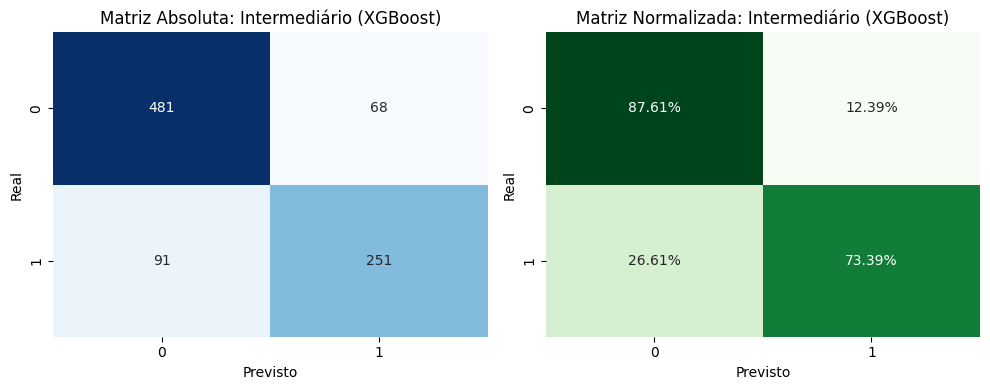

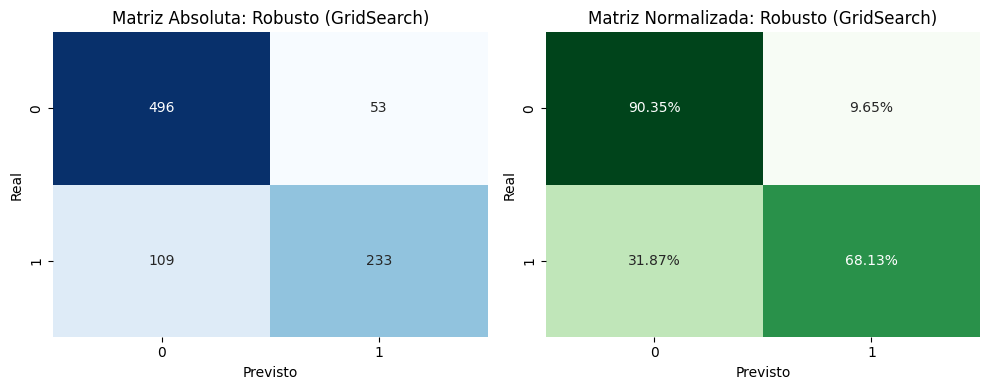


--- COMPARATIVO FINAL DE MÉTRICAS ---


,Acurácia,B. Acc,Precision,Recall,F1-Score
Modelo,,,,,
Intermediário (XGBoost),0.821549,0.805028,0.786834,0.733918,0.759455
Simples (RF),0.811448,0.795729,0.768519,0.728070,0.747748
Robusto (GridSearch),0.818182,0.792374,0.814685,0.681287,0.742038


In [29]:
from sklearn.metrics import (classification_report, confusion_matrix,
                            accuracy_score, balanced_accuracy_score, f1_score, precision_score, recall_score)
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import train_test_split
import seaborn as sns

# Vamos criar um dicionário para guardar as métricas detalhadas
metrics_list = []

print("📊 Gerando Relatórios Detalhados...\n")

# Para este exemplo, vamos usar o X_valid e y_valid
# Ainda não criamos o conjunto de validação, mas podemos utilizar o train_test_split para criar um conjunto com 20% do conjunto do treino
# X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)
# Porém, como estamos usando o cross_val_predict, isso não será necessário

for name, pipe in pipelines:
    y_pred = cross_val_predict(pipe, X, y, cv=5)

    # Cálculo das métricas (focando na classe 1 - Sobreviventes)
    acc = accuracy_score(y, y_pred)
    b_acc = balanced_accuracy_score(y, y_pred)
    prec = precision_score(y, y_pred)
    rec = recall_score(y, y_pred)
    f1 = f1_score(y, y_pred)
    
    # Armazenar no dicionário
    metrics_list.append({
        'Modelo': name,
        'Acurácia': acc,
        'B. Acc': b_acc,
        'Precision': prec,
        'Recall': rec,
        'F1-Score': f1
    })
    
    # Calculando Matrizes de Confusão (Absoluta e Normalizada)
    cm = confusion_matrix(y, y_pred)
    cm_norm = confusion_matrix(y, y_pred, normalize='true') # Normalização por linha

    # Plotando as duas lado a lado
    fig, ax = plt.subplots(1, 2, figsize=(10, 4))
    
    # Matriz Absoluta
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax[0], cbar=False)
    ax[0].set_title(f'Matriz Absoluta: {name}')
    ax[0].set_ylabel('Real')
    ax[0].set_xlabel('Previsto')
    
    # Matriz Normalizada
    sns.heatmap(cm_norm, annot=True, fmt='.2%', cmap='Greens', ax=ax[1], cbar=False)
    ax[1].set_title(f'Matriz Normalizada: {name}')
    ax[1].set_ylabel('Real')
    ax[1].set_xlabel('Previsto')
    
    plt.tight_layout()
    plt.show()    

# Transformar em DataFrame para comparar lado a lado
df_comparison = pd.DataFrame(metrics_list).set_index('Modelo')
print("\n--- COMPARATIVO FINAL DE MÉTRICAS ---")
display(df_comparison.sort_values(by='F1-Score', ascending=False).style.background_gradient(cmap='YlGn'))

Podemos observar na tabela comparativa que o XGBoost teve o melhor desempenho.

# 4. Importância das Features

Agora precisamos saber quais informações o XGBoost usou para chegar nesses números?

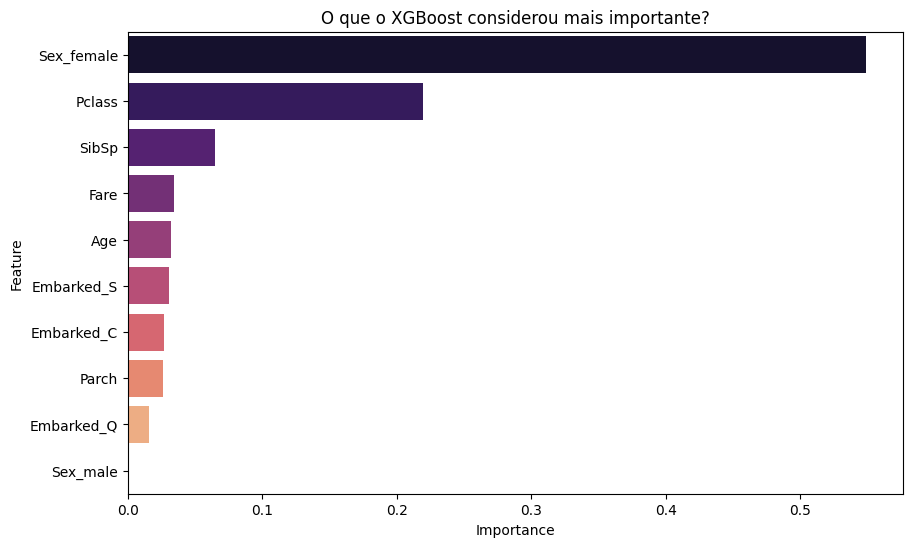

In [31]:
# Pegar o modelo treinado de dentro do Pipeline
best_model = pipeline_inter.named_steps['model']

# Pegar os nomes das colunas após a transformação
# Colunas numéricas continuam as mesmas
# Colunas categóricas foram transformadas pelo OneHotEncoder
cat_features = pipeline_inter.named_steps['preprocessor'] \
                .transformers_[1][1].named_steps['onehot'] \
                .get_feature_names_out(categorical_cols).tolist()

all_features = numerical_cols + cat_features

# Criar o DataFrame de Importância
feature_importance = pd.DataFrame({
    'Feature': all_features,
    'Importance': best_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Plotar gráfico
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Importance', 
    y='Feature', 
    data=feature_importance, 
    hue='Feature',    # Atribui a variável ao hue
    palette='magma', 
    legend=False      # Remove a legenda para limpar o gráfico
)
plt.title('O que o XGBoost considerou mais importante?')
plt.show()

Agora que temos o gráfico, as 3 primeiras barras nos revelam algumas informações:

- **Sex_female**: O modelo "aprendeu" que ser mulher é o maior preditor de sobrevivência.

- **Pclass**: A classe socioeconômica vem logo em seguida.

- **SibSp**: Número de irmãos ou cônjuges a bordo.

O tamanho da família foi um fator decisivo, mas não de forma linear. Famílias muito grandes tiveram dificuldade em se reunir e chegar aos botes juntas, enquanto pessoas sozinhas também tinham menos apoio. O XGBoost percebeu que essa contagem é um preditor forte.

## 4.1 Feature Engineering

Já que o modelo deu tanto peso para a família (SibSp), podemos ajudá-lo criando uma variável que resuma o tamanho total da família. Atualmente, a informação está dividida entre SibSp (irmãos/cônjuges) e Parch (pais/filhos).

Podemos criar a coluna FamilySize e outra chamada IsAlone (Se está sozinho):

In [36]:
# Criação da coluna Familysize
train_data['FamilySize'] = train_data['SibSp'] + train_data['Parch'] + 1
test_data['FamilySize'] = test_data['SibSp'] + test_data['Parch'] + 1
# Criação da coluna IsAlone
train_data['IsAlone'] = (train_data['FamilySize'] == 1).astype(int)
test_data['IsAlone'] = (test_data['FamilySize'] == 1).astype(int)

# Agora atualizamos nossa lista de colunas numéricas!
numerical_cols = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'FamilySize', 'IsAlone']

In [38]:
from sklearn.model_selection import cross_val_score

X = train_data[numerical_cols + categorical_cols]
y = train_data.Survived

# Reconfigurando os Transformers
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_transformer, numerical_cols),
    ('cat', categorical_transformer, categorical_cols)
])

# Pipeline Final com XGBoost
pipeline_final = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', XGBClassifier(n_estimators=500, learning_rate=0.05, n_jobs=-1, random_state=42))
])

# Avaliando o novo desempenho do modelo
scores = cross_val_score(pipeline_final, X, y, cv=5, scoring='f1')

print(f"🚀 Novo F1-Score médio: {scores.mean():.4f}")

🚀 Novo F1-Score médio: 0.7590


In [39]:
# Definimos os dois competidores
competidores = [
    ("XGBoost Original", pipeline_inter), # O original
    ("XGBoost + Engenharia", pipeline_final) # O atualizado
]

results_comparison = []

print("📊 Comparando o impacto da Engenharia de Variáveis...\n")

for name, pipe in competidores:
    # Predições
    y_pred = cross_val_predict(pipe, X, y, cv=5)
    
    # Métricas
    results_comparison.append({
        'Configuração': name,
        'Acurácia': accuracy_score(y, y_pred),
        'B. Acc': balanced_accuracy_score(y, y_pred),
        'Precision': precision_score(y, y_pred),
        'Recall': recall_score(y, y_pred),
        'F1-Score': f1_score(y, y_pred)
    })

# Exibição da Tabela
df_final_comp = pd.DataFrame(results_comparison).set_index('Configuração')
display(df_final_comp.style.background_gradient(cmap='Blues'))

📊 Comparando o impacto da Engenharia de Variáveis...



,Acurácia,B. Acc,Precision,Recall,F1-Score
Configuração,,,,,
XGBoost Original,0.821549,0.805028,0.786834,0.733918,0.759455
XGBoost + Engenharia,0.820426,0.805220,0.780864,0.739766,0.759760


In [41]:
# Treinar o modelo vencedor com TODOS os dados de treino disponíveis
# Isso dá ao modelo a chance de ver 100% dos exemplos antes do teste real
pipeline_final.fit(X, y)

# Fazer as predições no dataset de TESTE (que já tem FamilySize e IsAlone)
# Usamos apenas as colunas que o modelo espera
X_test = test_data[numerical_cols + categorical_cols]
predictions = pipeline_final.predict(X_test)

# Criar o DataFrame de submissão
submission = pd.DataFrame({
    'PassengerId': test_data['PassengerId'],
    'Survived': predictions.astype(int)
})

# Salvar o arquivo CSV
submission.to_csv('submission_final.csv', index=False)

print("✅ Arquivo 'submission_final.csv' gerado com sucesso!")
print("💡 Dica: Agora é só ir na aba 'Output' do seu notebook no Kaggle e submeter.")

✅ Arquivo 'submission_final.csv' gerado com sucesso!
💡 Dica: Agora é só ir na aba 'Output' do seu notebook no Kaggle e submeter.


# 5. Exploração adicional: Títulos dos passageiros

## 5.1 Por que os Títulos são valiosos?

Essa informação é interessante porque o título condensa várias variáveis em uma só: **Sexo**, **Idade** e **Status Social**.

**Master**: Identifica meninos (homens jovens). No Titanic, homens adultos tiveram a menor taxa de sobrevivência, mas "Masters" tiveram uma taxa muito alta. Sem o título, o modelo pode ter dificuldade em separar um menino de 5 anos de um senhor de 50 se a coluna Age estiver nula.

**Títulos Nobres**: Títulos como Dr, Lady, Sir ou The Countess indicam prestígio, o que muitas vezes resultava em prioridade no acesso aos botes, independentemente da classe.

**Imputação de Idade**: Se um passageiro não tem a idade preenchida, mas o título é "Miss", você sabe que a idade média dela provavelmente é menor do que a de uma "Mrs".

In [43]:
import re

def get_title(name):
    # Procura por um padrão de letras que termina com ponto (ex: Mr.)
    title_search = re.search(r' ([A-Za-z]+)\.', name)
    if title_search:
        return title_search.group(1)
    return ""

# Aplicando nos dois datasets
for df in [train_data, test_data]:
    df['Title'] = df['Name'].apply(get_title)

# Vamos ver quais títulos apareceram
print(train_data['Title'].value_counts())

Title
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Mlle          2
Major         2
Ms            1
Mme           1
Don           1
Lady          1
Sir           1
Capt          1
Countess      1
Jonkheer      1
Name: count, dtype: int64


Podemos ver que há alguns títulos diferentes, como **Jonkheer** e **Mlle** (*Mademoiselle*). Precisamos fazer um tratamento nessas informações.

In [44]:
for df in [train_data, test_data]:
    # Agrupando títulos similares ou raros
    df['Title'] = df['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    df['Title'] = df['Title'].replace('Mlle', 'Miss')
    df['Title'] = df['Title'].replace('Ms', 'Miss')
    df['Title'] = df['Title'].replace('Mme', 'Mrs')

# Verificando o resultado final
print(train_data[['Title', 'Survived']].groupby(['Title'], as_index=False).mean())

    Title  Survived
0  Master  0.575000
1    Miss  0.702703
2      Mr  0.156673
3     Mrs  0.793651
4    Rare  0.347826


Com essas novas informações, vemos que os homens realmente tiveram uma taxa menor de sobrevivências, mesmo os pertecentes a nobreza.

In [63]:
# Agora podemos adicionar o Title nas variáveis categóricas
categorical_cols = ['Sex', 'Embarked', 'Title']

# Atualizando as variáveis do treino
X = train_data[numerical_cols + categorical_cols]
y = train_data.Survived

print("📊 Comparando o impacto dos Títulos dos passageiros...\n")

# Criando o Pipeline Final (O mesmo preprocessor que já usamos)
preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_transformer, numerical_cols),
    ('cat', categorical_transformer, categorical_cols)
])

pipeline_ultimate = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', XGBClassifier(n_estimators=500, learning_rate=0.05, n_jobs=-1, random_state=42))
])

scores = cross_val_score(pipeline_ultimate, X, y, cv=5, scoring='f1')

print(f"🏆 F1-Score com Títulos: {scores.mean():.6f}")

📊 Comparando o impacto dos Títulos dos passageiros...

🏆 F1-Score com Títulos: 0.762305


## 5.2 Testando hiperparâmetros

O modelo ainda não melhorou bastante. Vamos utilizar o GridSearchCV para encontrar a melhor combinação de hiperparâmetros.

In [64]:
# Definir o espaço de busca
# Vamos testar combinações de n_estimators e learning_rate
param_grid = {
    'model__n_estimators': [50, 75, 100, 150, 200, 500],
    'model__learning_rate': [0.001, 0.01, 0.05, 0.1, 0.2, 0.5, 1],
    'model__max_depth': [3, 5, 7]
}

# Configurar o GridSearch
# Usamos o pipeline_ultimate como base
grid_search = GridSearchCV(
    pipeline_ultimate, 
    param_grid, 
    cv=5, 
    scoring='f1', 
    n_jobs=-1,
    verbose=1
)

#  Executar a busca
print("🔍 Buscando a melhor combinação de parâmetros...")
grid_search.fit(X, y)

# Resultados
print(f"✅ Melhor F1-Score: {grid_search.best_score_:.4f}")
print(f"⚙️ Melhores Parâmetros: {grid_search.best_params_}")

🔍 Buscando a melhor combinação de parâmetros...
Fitting 5 folds for each of 126 candidates, totalling 630 fits
✅ Melhor F1-Score: 0.7886
⚙️ Melhores Parâmetros: {'model__learning_rate': 0.2, 'model__max_depth': 5, 'model__n_estimators': 50}


Vamos passar mais um GridSearch, agora mais focado nos hiperparâmetros encontrados.

In [66]:
# Definir o espaço de busca
# Vamos testar combinações de n_estimators e learning_rate
param_grid = {
    'model__n_estimators': [30, 35, 40, 45, 50, 55, 60, 65, 70],
    'model__learning_rate': [0.1, 0.15, 0.2, 0.25, 0.3],
    'model__max_depth': [4, 5, 6]
}

# Configurar o GridSearch
# Usamos o pipeline_ultimate como base
grid_search = GridSearchCV(
    pipeline_ultimate, 
    param_grid, 
    cv=5, 
    scoring='f1', 
    n_jobs=-1,
    verbose=1
)

#  Executar a busca
print("🔍 Buscando a melhor combinação de parâmetros...")
grid_search.fit(X, y)

# Resultados
print(f"✅ Melhor F1-Score: {grid_search.best_score_:.4f}")
print(f"⚙️ Melhores Parâmetros: {grid_search.best_params_}")

🔍 Buscando a melhor combinação de parâmetros...
Fitting 5 folds for each of 135 candidates, totalling 675 fits
✅ Melhor F1-Score: 0.7925
⚙️ Melhores Parâmetros: {'model__learning_rate': 0.3, 'model__max_depth': 4, 'model__n_estimators': 35}


Encontramos novos valores. Vamos rodar o GridSearch mais uma vez, apenas por precaução.

In [68]:
# Definir o espaço de busca
# Vamos testar combinações de n_estimators e learning_rate
param_grid = {
    'model__n_estimators': [30, 33, 34, 35, 36, 37, 40],
    'model__learning_rate': [0.27, 0.28, 0.29, 0.3, 0.31, 0.32, 0.33, 0.34, 0.35],
    'model__max_depth': [3, 4, 5]
}

# Configurar o GridSearch
# Usamos o pipeline_ultimate como base
grid_search = GridSearchCV(
    pipeline_ultimate, 
    param_grid, 
    cv=5, 
    scoring='f1', 
    n_jobs=-1,
    verbose=1
)

#  Executar a busca
print("🔍 Buscando a melhor combinação de parâmetros...")
grid_search.fit(X, y)

# Resultados
print(f"✅ Melhor F1-Score: {grid_search.best_score_:.4f}")
print(f"⚙️ Melhores Parâmetros: {grid_search.best_params_}")

🔍 Buscando a melhor combinação de parâmetros...
The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.
Fitting 5 folds for each of 189 candidates, totalling 945 fits
✅ Melhor F1-Score: 0.7939
⚙️ Melhores Parâmetros: {'model__learning_rate': 0.3, 'model__max_depth': 4, 'model__n_estimators': 36}


Após os três GridSearches conseguimos confirmar os melhores hiperparâmetros para nosso XGBoost.

## 5.3 Importância das Features (com hiperparâmetros otimizados)

Como agora temos o modelo "perfeito" e todas as variáveis (Família, Títulos, Sexo, Classe) podemos verificar a Importância das Features mais uma vez.

Com o learning_rate mais alto, o modelo pode ter mudado suas prioridades.

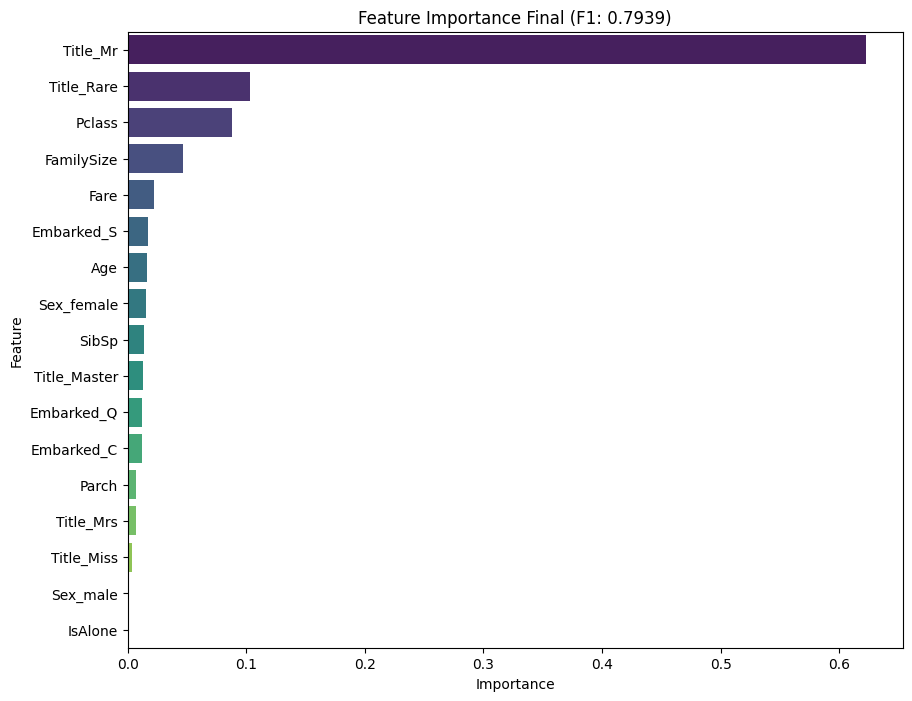

In [69]:
# Pegar o melhor modelo do GridSearch
best_pipe = grid_search.best_estimator_
model = best_pipe.named_steps['model']

# Recuperar os nomes das colunas transformadas
cat_features = best_pipe.named_steps['preprocessor'] \
                .transformers_[1][1].named_steps['onehot'] \
                .get_feature_names_out(categorical_cols).tolist()
all_features = numerical_cols + cat_features

# Criar e ordenar o DataFrame de importância
feat_imp = pd.DataFrame({'Feature': all_features, 'Importance': model.feature_importances_})
feat_imp = feat_imp.sort_values(by='Importance', ascending=False)

# Plotar gráfico
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feat_imp, hue='Feature', palette='viridis', legend=False)
plt.title(f'Feature Importance Final (F1: {grid_search.best_score_:.4f})')
plt.show()

## 5.4 Comparação final entre os modelos Pipeline

Agora que extraimos tudo (ou quase tudo) de nosso Pipeline, podemos fazer a comparação final e ver o ganho que obtivemos.

🏁 Iniciando o duelo final de modelos...


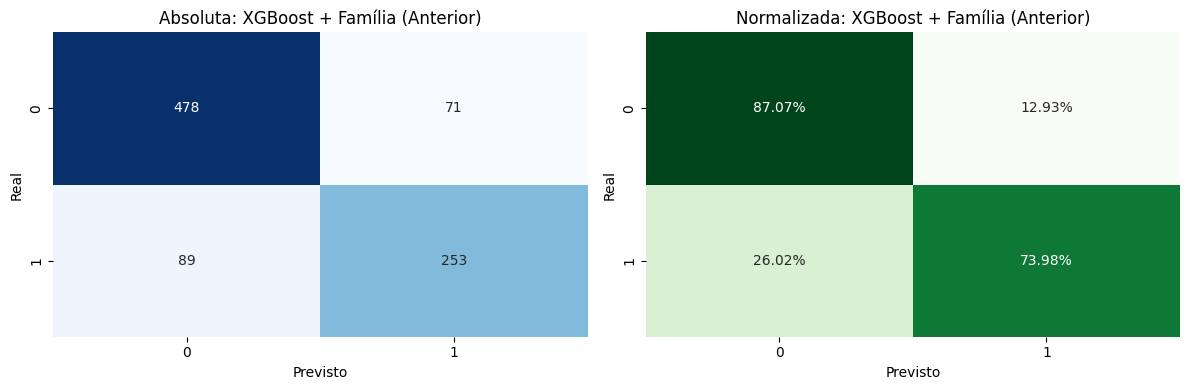

📊 XGBoost + Família (Anterior) -> F1-Score: 0.7598 | Recall (Taxa de Sobreviventes Salvos): 73.98%
----------------------------------------------------------------------------------------------------


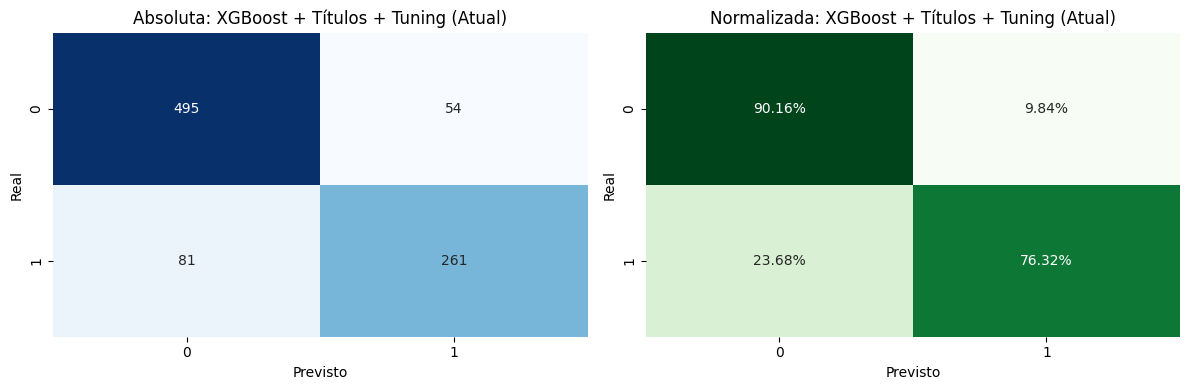

📊 XGBoost + Títulos + Tuning (Atual) -> F1-Score: 0.7945 | Recall (Taxa de Sobreviventes Salvos): 76.32%
----------------------------------------------------------------------------------------------------


,Acurácia,B. Acc,Precision,Recall,F1-Score
Modelo,,,,,
XGBoost + Família (Anterior),0.820426,0.805220,0.780864,0.739766,0.759760
XGBoost + Títulos + Tuning (Atual),0.848485,0.832399,0.828571,0.763158,0.794521


In [71]:
# Definimos os modelos para o duelo final
# O 'best_estimator_' é o modelo que o GridSearch marcou como campeão
modelos_finais = [
    ("XGBoost + Família (Anterior)", pipeline_final),
    ("XGBoost + Títulos + Tuning (Atual)", grid_search.best_estimator_)
]

final_results = []

print("🏁 Iniciando o duelo final de modelos...")

for name, pipe in modelos_finais:
    # Predições via Cross-Validation para evitar sorte/azar
    y_pred = cross_val_predict(pipe, X, y, cv=5)
    
    final_results.append({
        'Modelo': name,
        'Acurácia': accuracy_score(y, y_pred),
        'B. Acc': balanced_accuracy_score(y, y_pred),
        'Precision': precision_score(y, y_pred),
        'Recall': recall_score(y, y_pred),
        'F1-Score': f1_score(y, y_pred)
    })

    # Gerando as matrizes
    cm = confusion_matrix(y, y_pred)
    cm_norm = confusion_matrix(y, y_pred, normalize='true')

    # Plotando lado a lado
    fig, ax = plt.subplots(1, 2, figsize=(12, 4))
    
    # Matriz Absoluta
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax[0], cbar=False)
    ax[0].set_title(f'Absoluta: {name}')
    ax[0].set_ylabel('Real')
    ax[0].set_xlabel('Previsto')
    
    # Matriz Normalizada
    sns.heatmap(cm_norm, annot=True, fmt='.2%', cmap='Greens', ax=ax[1], cbar=False)
    ax[1].set_title(f'Normalizada: {name}')
    ax[1].set_ylabel('Real')
    ax[1].set_xlabel('Previsto')
    
    plt.tight_layout()
    plt.show()
    
    # Resumo rápido abaixo de cada par de matrizes
    f1 = f1_score(y, y_pred)
    rec = recall_score(y, y_pred)
    print(f"📊 {name} -> F1-Score: {f1:.4f} | Recall (Taxa de Sobreviventes Salvos): {rec:.2%}")
    print("-" * 100)

# Exibição da Tabela Comparativa
df_final = pd.DataFrame(final_results).set_index('Modelo')
# Aplicando um gradiente para destacar os melhores valores
display(df_final.style.background_gradient(cmap='RdYlGn'))

# 6. Fine Tuning no modelo Baseline

Podemos testar mais algumas estratégias para ver se nosso modelo pode melhorar:

**1. Imputação Inteligente de Idade**
Atualmente, estamos usando a mediana para preencher idades nulas. Mas agora que temos os Títulos, podemos ser mais precisos. Um "Master" com idade nula certamente é uma criança, enquanto um "Mr" é um adulto.

**Ideia**: Preencher a idade usando a mediana de cada Título.

**2. Extração de Cabines (Deck)**
A coluna Cabin parece inútil por ter muitos nulos, mas a letra da cabine (A, B, C, D, E...) indica o Deck onde o passageiro estava. Decks superiores ficavam mais perto dos botes.

**Ideia**: Extrair a primeira letra da cabine. Se for nulo, marcar como "Unknown".

**3. Ensemble (Voting Classifier)**
Em vez de confiar só no XGBoost, podemos fazer uma "votação". Pegamos o melhor XGBoost, um Random Forest tunado e um Logistic Regression, e deixamos eles votarem no resultado final. Isso costuma estabilizar as predições e eliminar erros individuais.

In [73]:
# Fazendo a imputação inteligente ANTES do pipeline
for df in [train_data, test_data]:
    # Agrupamos por Título e preenchemos a idade com a mediana de cada grupo
    df['Age'] = df.groupby('Title')['Age'].transform(lambda x: x.fillna(x.median()))

print("✅ Idades imputadas com base nos títulos (Master, Miss, Mr, etc.)")

✅ Idades imputadas com base nos títulos (Master, Miss, Mr, etc.)


In [74]:
for df in [train_data, test_data]:
    # Pegamos a primeira letra da cabine, se for nulo, usamos 'U' (Unknown)
    df['Deck'] = df['Cabin'].apply(lambda x: x[0] if pd.notnull(x) else 'U')

# Adicionamos 'Deck' às colunas categóricas
categorical_cols = ['Sex', 'Embarked', 'Title', 'Deck']

print("✅ Informação de Deck extraída da coluna Cabin.")

✅ Informação de Deck extraída da coluna Cabin.


Vamos utilizar o GridSearchCV mais uma vez para garantir que escolhemos os melhores hiperparâmetros para o modelo.

In [87]:
# Definindo o espaço de busca
# Vamos testar valores próximos aos que usamos antes
param_grid = {
    'model__n_estimators': [20, 25, 30, 35, 40, 45, 50],
    'model__learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5],
    'model__max_depth': [3, 4, 5],
    'model__gamma': [0, 0.1, 0.2] # Adicionando regularização para evitar overfitting
}

# Configuramos o GridSearch usando o pipeline_refined
grid_search_refined = GridSearchCV(
    pipeline_refined, 
    param_grid, 
    cv=5, 
    scoring='f1', 
    n_jobs=-1,
    verbose=1
)

# Executamos a busca nos dados atualizados
print("🔍 Otimizando o modelo com Idades por Título e Decks...")
grid_search_refined.fit(X, y)

# Resultados Finais
print(f"✅ Melhor F1-Score Refinado: {grid_search_refined.best_score_:.4f}")
print(f"⚙️ Melhores Parâmetros: {grid_search_refined.best_params_}")

🔍 Otimizando o modelo com Idades por Título e Decks...
Fitting 5 folds for each of 315 candidates, totalling 1575 fits
✅ Melhor F1-Score Refinado: 0.7905
⚙️ Melhores Parâmetros: {'model__gamma': 0.2, 'model__learning_rate': 0.4, 'model__max_depth': 5, 'model__n_estimators': 20}


Como houve muitas mudançãs em relação ao último pipeline, vamos aplicar o GridSearchCV de novo.

In [88]:
# Definindo o espaço de busca
# Vamos testar valores próximos aos que usamos antes
param_grid = {
    'model__n_estimators': [10, 15, 17, 18, 19, 20, 21, 22, 23, 25],
    'model__learning_rate': [0.35, 0.38, 0.4, 0.42, 0.45, 0.5],
    'model__max_depth': [4, 5, 6, 7],
    'model__gamma': [0.1, 0.18, 0.2, 0.22, 0.3] # Adicionando regularização para evitar overfitting
}

# Configuramos o GridSearch usando o pipeline_refined
grid_search_refined = GridSearchCV(
    pipeline_refined, 
    param_grid, 
    cv=5, 
    scoring='f1', 
    n_jobs=-1,
    verbose=1
)

# Executamos a busca nos dados atualizados
print("🔍 Otimizando o modelo com Idades por Título e Decks...")
grid_search_refined.fit(X, y)

# Resultados Finais
print(f"✅ Melhor F1-Score Refinado: {grid_search_refined.best_score_:.4f}")
print(f"⚙️ Melhores Parâmetros: {grid_search_refined.best_params_}")

🔍 Otimizando o modelo com Idades por Título e Decks...
Fitting 5 folds for each of 1200 candidates, totalling 6000 fits
✅ Melhor F1-Score Refinado: 0.7905
⚙️ Melhores Parâmetros: {'model__gamma': 0.2, 'model__learning_rate': 0.4, 'model__max_depth': 5, 'model__n_estimators': 20}


Os valores se confirmaram, mas vamos rodar o GridSearchCV uma última vez.

In [140]:
# Definindo o espaço de busca
# Vamos testar valores próximos aos que usamos antes
param_grid = {
    'model__n_estimators': [17, 18, 19, 20, 21],
    'model__learning_rate': [0.39, 0.399, 0.4, 0.401, 0.41],
    'model__max_depth': [3, 4, 5],
    'model__gamma': [0.17, 0.18, 0.19, 0.195, 0.2] # Adicionando regularização para evitar overfitting
}

# Configuramos o GridSearch usando o pipeline_refined
grid_search_refined = GridSearchCV(
    pipeline_refined, 
    param_grid, 
    cv=5, 
    scoring='f1', 
    n_jobs=-1,
    verbose=1
)

# Executamos a busca nos dados atualizados
print("🔍 Otimizando o modelo com Idades por Título e Decks...")
grid_search_refined.fit(X, y)

# Resultados Finais
print(f"✅ Melhor F1-Score Refinado: {grid_search_refined.best_score_:.4f}")
print(f"⚙️ Melhores Parâmetros: {grid_search_refined.best_params_}")

🔍 Otimizando o modelo com Idades por Título e Decks...
Fitting 5 folds for each of 375 candidates, totalling 1875 fits
✅ Melhor F1-Score Refinado: 0.7905
⚙️ Melhores Parâmetros: {'model__gamma': 0.2, 'model__learning_rate': 0.4, 'model__max_depth': 5, 'model__n_estimators': 20}


## 6.1 Ensemble (Voting Classifier)

o XGBoost é ótimo, mas ele tem seus pontos cegos. Se combinarmos ele com um Random Forest (que olha para os dados de forma diferente) e uma Regressão Logística (que é um modelo linear estável), a média dos votos tende a ser mais robusta.

Vamos começar otimizando o Random Forest.

In [159]:
# Definir o Pipeline para RF
pipeline_rf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestClassifier(random_state=42))
])

# Grade de parâmetros para RF
param_grid_rf = {
    'model__n_estimators': [225, 250, 255],
    'model__max_depth': [5, 6, 7],
    'model__min_samples_leaf': [2, 3, 4],
    'model__criterion': ['gini', 'entropy']
}

grid_rf = GridSearchCV(pipeline_rf, param_grid_rf, cv=5, scoring='f1', n_jobs=-1)
grid_rf.fit(X, y)

print(f"🌲 Melhor F1-Score RF: {grid_rf.best_score_:.4f}")
print(f"⚙️ Melhores Parâmetros RF: {grid_rf.best_params_}")

🌲 Melhor F1-Score RF: 0.7758
⚙️ Melhores Parâmetros RF: {'model__criterion': 'gini', 'model__max_depth': 6, 'model__min_samples_leaf': 2, 'model__n_estimators': 225}


Agora podemos otimizar a Regressão Logística.

In [156]:
# Definir o Pipeline para LR
pipeline_lr1 = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LogisticRegression(max_iter=2000, random_state=42))
])

# Grade de parâmetros para LR
param_grid_lr = {
    'model__C': [0.33, 0.34, 0.35],
    'model__solver': ['liblinear'], # liblinear é bom para datasets pequenos
    'model__penalty': ['l1', 'l2'],
    'model__class_weight': [None, 'balanced']
}

grid_lr = GridSearchCV(pipeline_lr1, param_grid_lr, cv=5, scoring='f1', n_jobs=-1)
grid_lr.fit(X, y)

print(f"📈 Melhor F1-Score LR: {grid_lr.best_score_:.4f}")
print(f"⚙️ Melhores Parâmetros LR: {grid_lr.best_params_}")

📈 Melhor F1-Score LR: 0.7746
⚙️ Melhores Parâmetros LR: {'model__C': 0.34, 'model__class_weight': None, 'model__penalty': 'l2', 'model__solver': 'liblinear'}


Como o solver 'lbfgs' não aceita penalidade precisamos testá-lo em uma nova célular.

In [158]:
# Definir o Pipeline para LR
pipeline_lr2 = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LogisticRegression(max_iter=2000, random_state=42))
])

# Grade de parâmetros para LR
param_grid_lr = {
    'model__C': [0.30, 0.35, 0.40],
    'model__solver': ['lbfgs'],
    'model__class_weight': [None, 'balanced']
}

grid_lr = GridSearchCV(pipeline_lr2, param_grid_lr, cv=5, scoring='f1', n_jobs=-1)
grid_lr.fit(X, y)

print(f"📈 Melhor F1-Score LR: {grid_lr.best_score_:.4f}")
print(f"⚙️ Melhores Parâmetros LR: {grid_lr.best_params_}")

📈 Melhor F1-Score LR: 0.7735
⚙️ Melhores Parâmetros LR: {'model__C': 0.35, 'model__class_weight': None, 'model__solver': 'lbfgs'}


In [160]:
from sklearn.ensemble import VotingClassifier

# Extraímos os melhores modelos (já treinados com os melhores parâmetros)
# Usamos o .best_estimator_.named_steps['model'] para pegar apenas o algoritmo tunado
xgb_top = grid_search_refined.best_estimator_.named_steps['model']
rf_top = grid_rf.best_estimator_.named_steps['model']
lr_top = grid_lr.best_estimator_.named_steps['model']

# Criamos o Comitê (Voting Classifier)
# Usamos 'soft' porque ele tira a média das probabilidades, o que é mais refinado que o voto seco (hard)
voting_model = VotingClassifier(
    estimators=[
        ('xgb', xgb_top),
        ('rf', rf_top),
        ('lr', lr_top)
    ],
    voting='soft',
    weights=[2, 1, 1] # Opcional: damos peso 2 para o XGBoost por ele ser o melhor modelo
)

# Criamos o Pipeline Definitivo
# O preprocessor é o mesmo que já usamos, garantindo que os dados cheguem limpos ao comitê
pipeline_ultimate_ensemble = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('ensemble', voting_model)
])

# Avaliação Final com Cross-Validation
scores_final = cross_val_score(pipeline_ultimate_ensemble, X, y, cv=5, scoring='f1')

print(f"🏟️ F1-Score do Ensemble Final: {scores_final.mean():.4f}")
print(f"📊 Desvio Padrão: {scores_final.std():.4f} (Quanto menor, mais confiável é o modelo)")

🏟️ F1-Score do Ensemble Final: 0.7761
📊 Desvio Padrão: 0.0441 (Quanto menor, mais confiável é o modelo)


In [165]:
# Definindo o comitê base sem pesos fixos para o GridSearch
voting_model = VotingClassifier(
    estimators=[('xgb', xgb_top), ('rf', rf_top), ('lr', lr_top)],
    voting='soft'
)

pipeline_ultimate_ensemble = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('ensemble', voting_model)
])

# Testando combinações de pesos
param_grid_weights = {
    'ensemble__weights': [[1, 1, 1], [2, 1, 1], [1, 2, 1], [1, 1, 2], [3, 1, 1], [1, 1, 3], [2, 1, 3], [3, 2, 1]]
}

search_weights = GridSearchCV(pipeline_ultimate_ensemble, param_grid_weights, cv=5, scoring='f1')
search_weights.fit(X, y)

print(f"🏆 Melhor F1 com pesos: {search_weights.best_score_:.4f}")
print(f"⚖️ Pesos ideais: {search_weights.best_params_}")

🏆 Melhor F1 com pesos: 0.7829
⚖️ Pesos ideais: {'ensemble__weights': [1, 1, 2]}


In [166]:
# Testando uma gama maior para a Regressão Logística (o terceiro valor)
param_grid_weights = {
    'ensemble__weights': [
        [1, 1, 2], 
        [1, 1, 3], 
        [2, 1, 3], 
        [1, 2, 3],
        [0.5, 0.5, 2] # Testando dar quase todo o poder para a LR
    ]
}

search_weights = GridSearchCV(pipeline_ultimate_ensemble, param_grid_weights, cv=6, scoring='f1')
search_weights.fit(X, y)

print(f"🏆 Novo recorde do Ensemble: {search_weights.best_score_:.4f}")
print(f"⚖️ Novos pesos ideais: {search_weights.best_params_}")

🏆 Novo recorde do Ensemble: 0.7829
⚖️ Novos pesos ideais: {'ensemble__weights': [1, 1, 2]}


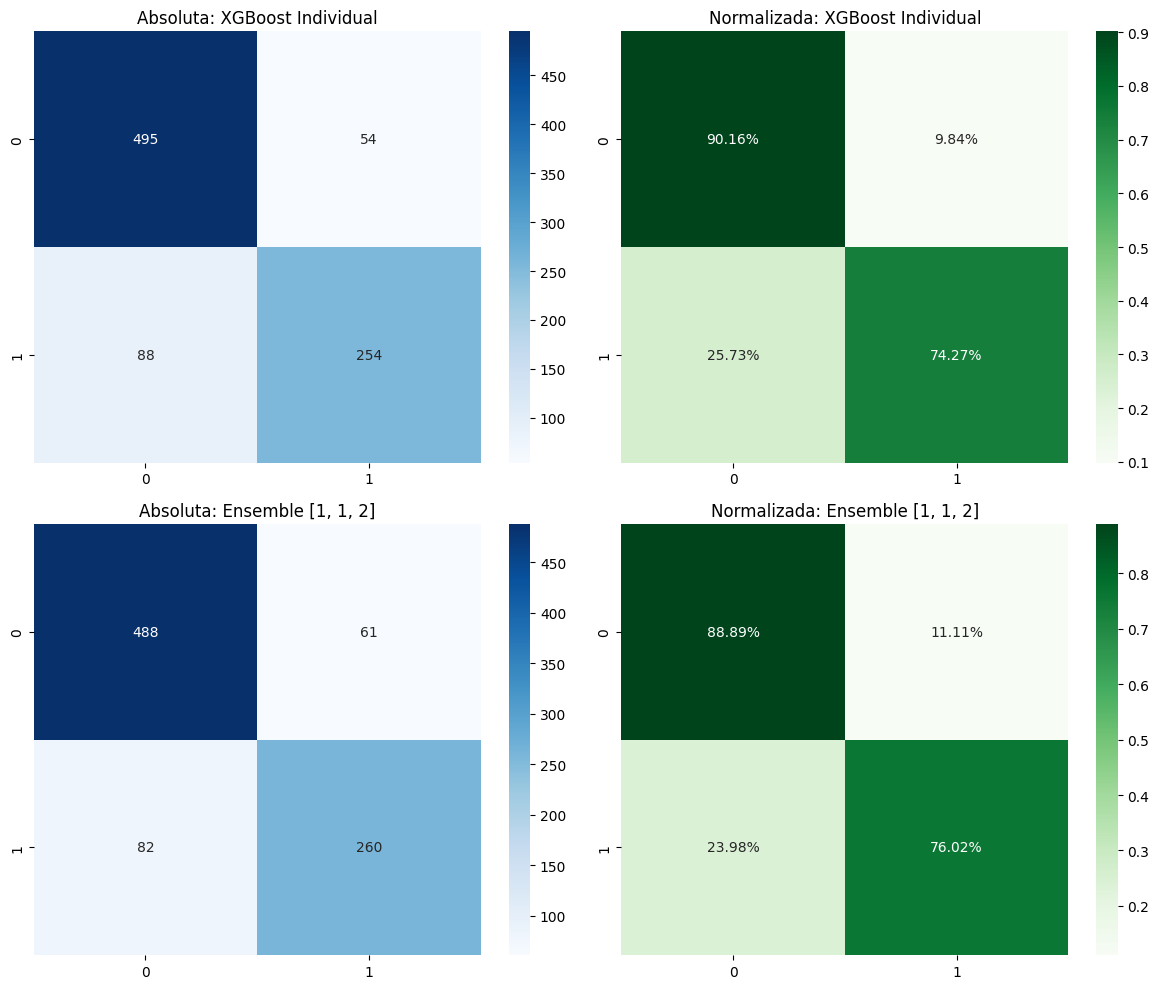

,Acurácia,Precisão,Recall,F1-Score
Modelo,,,,
XGBoost Individual,0.840629,0.824675,0.742690,0.781538
"Ensemble [1, 1, 2]",0.839506,0.809969,0.760234,0.784314


In [167]:
# Definimos os dois competidores finais
modelos_finais = [
    ("XGBoost Individual", grid_search_refined.best_estimator_),
    ("Ensemble [1, 1, 2]", search_weights.best_estimator_)
]

resumo_metricas = []

# Criando a figura para as matrizes
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

for i, (name, pipe) in enumerate(modelos_finais):
    # Predições via Cross-Validation (cv=6 como você definiu)
    y_pred = cross_val_predict(pipe, X, y, cv=6)
    
    # Cálculo das métricas
    resumo_metricas.append({
        'Modelo': name,
        'Acurácia': accuracy_score(y, y_pred),
        'Precisão': precision_score(y, y_pred),
        'Recall': recall_score(y, y_pred),
        'F1-Score': f1_score(y, y_pred)
    })
    
    # Matriz de Confusão Absoluta
    cm = confusion_matrix(y, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i, 0])
    axes[i, 0].set_title(f'Absoluta: {name}')
    
    # Matriz de Confusão Normalizada
    cm_norm = confusion_matrix(y, y_pred, normalize='true')
    sns.heatmap(cm_norm, annot=True, fmt='.2%', cmap='Greens', ax=axes[i, 1])
    axes[i, 1].set_title(f'Normalizada: {name}')

plt.tight_layout()
plt.show()

# Exibindo a Tabela Comparativa
df_comparativo = pd.DataFrame(resumo_metricas).set_index('Modelo')
display(df_comparativo.style.background_gradient(cmap='RdYlGn'))